In [1]:
from transformers import BertJapaneseTokenizer, BertForSequenceClassification
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [11]:
tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
model = BertForSequenceClassification.from_pretrained(
    "cl-tohoku/bert-base-japanese-whole-word-masking", # 日本語Pre trainedモデルの指定
    num_labels = 2, # ラベル数（今回はBinayなので2、数値を増やせばマルチラベルも対応可）
    output_attentions = False, # アテンションベクトルを出力するか
    output_hidden_states = True, # 隠れ層を出力するか
)

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialize

In [3]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [4]:
import matplotlib.font_manager as fm
fm.findSystemFonts()

['/usr/share/fonts/truetype/migmix/migmix-2m-regular.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',
 '/usr/share/fonts/truetype/migmix/migmix-1p-regular.ttf',
 '/usr/share/fonts/truetype/migmix/migu-1p-bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/truetype/migmix/migmix-2m-bold.ttf',
 '/usr/share/fonts/truetype/migmix/migu-2m-bold.ttf',
 '/usr/share/fonts/truetype/migmix/migu-1c-regular.ttf',
 '/usr/share/fonts/truetype/migmix/migmix-1m-bold.ttf',
 '/usr/share/fonts/truetype/migmix/migu-1p-regular.ttf',
 '/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc',
 '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc',
 '/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc',
 '/usr/share/fonts/truetype/migmix/migmix-1m-regular.ttf',
 '/usr/share/fonts/truetype/migmix/migmix-2p-regular.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf',
 '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc',
 '/usr/share/fonts/truetype

In [5]:
import matplotlib
from matplotlib.font_manager import FontProperties
font_path = "/usr/share/fonts/truetype/migmix/migmix-1p-regular.ttf"
font_prop = FontProperties(fname=font_path)
matplotlib.rcParams["font.family"] = font_prop.get_name()

In [6]:
def get_embedding(word):
    tokenized_text = tokenizer.tokenize(word)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    tokens_tensor = torch.tensor([indexed_tokens])
    with torch.no_grad(): # 勾配計算なし
        all_encoder_layers = model(tokens_tensor)
    embedding = all_encoder_layers[1][-2].numpy()[0]
    t = np.mean(embedding, axis=0)
    return t

In [7]:
list_words = ['生物', '数学', '現代文', '世界史', '物理',
              '豚肉', '鶏肉', 'キャベツ', 'チーズ', '牛乳', '卵', '白菜', 'じゃがいも', 'ニンジン',
              '国土交通省', '厚生労働省', '外務省', '総務省',
              'バス停', '電車', '新幹線', 'バス', 'タクシー', '車', '自転車',
              '吾輩は猫である', '名前はまだない', 'ニャーニャー',
              '動物', 'アニマル', '野生', '猫', '犬', '猿', '鳥', 'ねこ', 'トリ',
              'こんにちは', 'さようなら', 'おやすみ',
              '意味', '概念', '性質', '哲学']

In [12]:
list_embedding = [get_embedding(w) for w in list_words]

In [13]:
pca = PCA(n_components=2)
z = pca.fit_transform(list_embedding).T

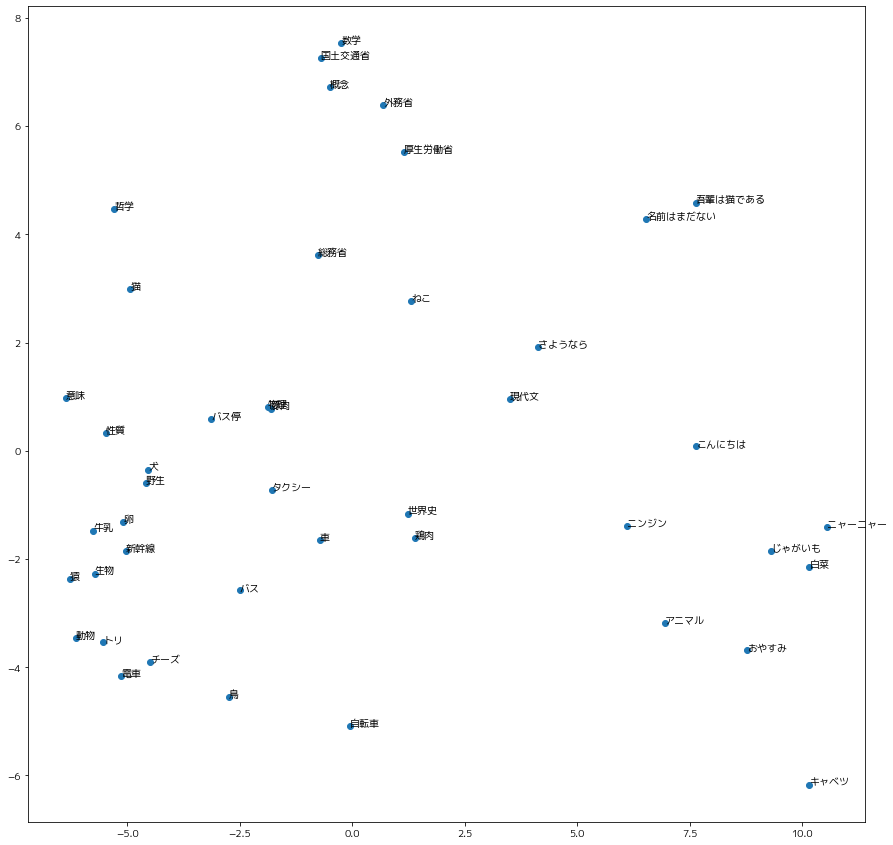

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(z[0], z[1], 'o')
for w, (x, y) in zip(list_words, z.T):
    ax.annotate(w, (x, y))

In [19]:
z_tsne = TSNE(n_components=2, perplexity=2).fit_transform(list_embedding).T

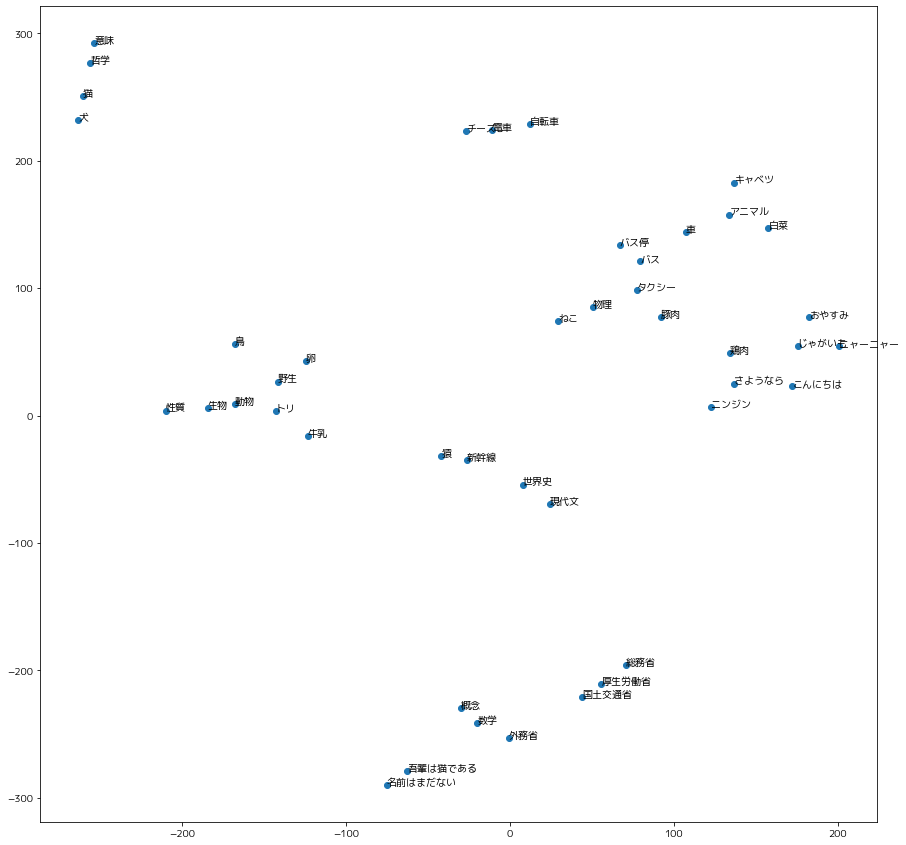

In [20]:
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(z_tsne[0], z_tsne[1], 'o')
for w, (x, y) in zip(list_words, z_tsne.T):
    ax.annotate(w, (x, y))